In [ ]:
  """
  Graph Ideas:
  * Learning Curve (training)
  * Computational Time VS N_pistons [done]
  * 
  """

In [1]:
!pip install stable-baselines[mpi]
!pip install tensorflow==1.15.0
!pip install gym
!pip install stable_baselines3

     |████████████████████████████████| 240 kB 27.7 MB/s 
     |████████████████████████████████| 2.4 MB 32.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.1-cp37-cp37m-linux_x86_64.whl size=2180563 sha256=0a04731123942c15fa7b52147a7eb73f49d9e7f0bc8b38b1acf1d405c7e065aa
  Stored in directory: /root/.cache/pip/wheels/91/be/c0/2b0347be1de5cd8ca9fe67da7ec8c3fe8930fcb6b0df6f2255
Successfully built mpi4py
     |████████████████████████████████| 412.3 MB 10 kB/s 
     |████████████████████████████████| 503 kB 21.5 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 3.8 MB 48.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=ae1748da8c68df542b67c82242209ce7861bf5d78d4a99a4334f3323c0519291
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f55

In [2]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
np.random.seed(99)

import gym
#import random

from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import matplotlib.cm as cm

1.15.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
TEST CODE HERE
"""  
t = np.random.randint(0, 3)
t
###

1

In [4]:
class BasicEnv(gym.Env):
    
    def __init__(self, numOfPistons, heightOfPiston, actionSpace, timeSteps):

      self.n_pistons = numOfPistons
      self.n_action = actionSpace
      self.height = heightOfPiston
      self.t = timeSteps
      
      self.action_space = gym.spaces.MultiDiscrete( [self.n_action] * self.n_pistons )
      self.observation_space = gym.spaces.MultiDiscrete([self.height] * self.n_pistons)

      self.ball_vector = np.asarray(([1] + [0] * (self.n_pistons - 1)))
      self.states = self.observation_space.sample()
      self.index = 0
      self.reward = 0
      self.done = False

    def step(self, action):
      states = np.asarray(self.states)
      self.index = np.argmax(self.ball_vector)

      if self.index + 1 != len(self.ball_vector):
        for i in range(self.index, self.index + 1): # reduced search space by checking neighbouring piston only
          if action[i] == 0:
            if states[i] != 0:
              states[i] -= 1

          elif action[i] == 2:
            if states[i] != self.height:
              states[i] += 1

      if self.index + 1 != len(self.ball_vector):
        if states[self.index] > states[self.index + 1]: 
          self.reward += 1
          self.ball_vector = np.zeros(self.n_pistons).astype(int)
          self.ball_vector[self.index + 1] = 1
          self.t -= 1
            
        else: 
          self.t -= 1 
          self.reward -= 1
  
      if self.index + 1 == self.n_pistons or self.t == 0:
        self.done = True

      info = {}
      return self.ball_vector, self.reward, self.done, info

    def reset(self):
      self.ball_vector = np.asarray([1] + [0] * (self.n_pistons - 1))
      #self.observation_space = gym.spaces.MultiDiscrete([self.height] * self.n_pistons)
      return self.ball_vector


    




In [ ]:
from stable_baselines.common.env_checker import check_env
n_steps = 1000
n_pistons = 20
n_height = 5
n_action = 3
env = BasicEnv(n_pistons, n_height, n_action, n_steps)
check_env(env)

In [5]:
from stable_baselines import PPO2
steps = 100
t = 1000
episodes = 100
seed = 99
pistons_n = 20

env = BasicEnv(pistons_n, 5, 3, 500)

model = PPO2("MlpPolicy", env, verbose=1, n_steps=steps, seed=99,tensorboard_log="/content/drive/My Drive/FYP/Logs/")
model.learn(total_timesteps=t)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Wrapping the env in a DummyVecEnv.





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




-------------------------------------
| approxkl           | 0.0029825536 |
| clipfrac           | 0.0375       |
| explained_variance | 0.000105     |
| fps                | 64           |
| n_updates          | 1            |
| policy_entropy     | 21.969234    |
| policy_loss        | -0.026250845 |
| serial_timesteps   | 100          |
| time_elapsed       | 3.89e-05     |
| total_timesteps    | 100          |
| value_loss         | 320146.53    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0034379298 |
| clipfrac           | 0.025        |
| explained_variance | 6.26e-05     |
| fps                | 579          |
| n_updates          | 2            |
| policy_entropy     | 21.94767     |
| policy_loss        | -0.011561005 |
| serial_timesteps   | 200          |
| time_elapsed       | 1.54         |
| total_timesteps    | 

In [6]:
!tensorboard --logdir /content/drive/My_Drive/FYP/Logs/PPO_2/ --host localhost --port 6006

TensorBoard 1.15.0 at http://localhost:6006/ (Press CTRL+C to quit)
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/util.py", line 320, in _exit_function
    def _exit_function(info=info, debug=debug, _run_finalizers=_run_finalizers,
KeyboardInterrupt


In [7]:
model.save("/content/drive/My Drive/FYP/Policies/Toy_Model_2.0")

In [8]:
model = PPO2.load("/content/drive/My Drive/FYP/Policies/Toy_Model_2.0")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [25]:
n_steps = 500
n_pistons = 20
n_height = 5
n_action = 3
n_episodes = 5

reward_lst = np.zeros( (n_episodes, n_steps) )
#env_states = []


for i in range(n_episodes):
  env = BasicEnv(n_pistons, n_height, n_action, n_steps)
  obs = env.reset()
  for step in range(n_steps):
    action, _ = model.predict(obs, deterministic = False)
    print(f"Step: {step + 1}\nAction: {action}")

    obs, reward, done, info = env.step(action)
    #current_env, obs, reward, done, info = env.step(action)
    print(f"\nBall Location: {obs}\nReward: {reward}\n\n")

    reward_lst[i, step] = reward
    #env_states.append(current_env.tolist())

    if np.argmax(obs) + 1 == n_pistons:
      print("Goal Achieved")
      break
      
    if done:
      print("Max Steps Reached")
      break    


Streaming output truncated to the last 5000 lines.
Action: [0 2 2 2 1 1 1 1 1 2 1 0 2 2 1 2 0 1 2 0]

Ball Location: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Reward: -90


Step: 113
Action: [0 1 2 1 2 2 0 2 0 2 2 2 0 0 2 1 0 2 2 2]

Ball Location: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Reward: -91


Step: 114
Action: [0 2 0 0 0 1 1 1 1 2 0 0 0 1 1 1 2 2 1 1]

Ball Location: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Reward: -92


Step: 115
Action: [0 2 2 2 1 1 2 1 0 0 1 0 2 2 1 1 0 2 2 1]

Ball Location: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Reward: -93


Step: 116
Action: [1 2 2 0 0 0 2 0 2 2 0 0 0 0 1 0 2 2 1 0]

Ball Location: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Reward: -94


Step: 117
Action: [1 0 1 0 1 0 1 2 1 2 0 1 1 1 2 2 1 1 2 0]

Ball Location: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Reward: -95


Step: 118
Action: [0 2 0 2 0 2 0 2 0 1 0 2 2 0 0 2 1 2 0 0]

Ball Location: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Reward: -96


Step: 119
Action: [0 0 0 0 1 2 1 1 

In [26]:
print(f"Number of Pistons: {n_pistons}\n\n")
averages = np.zeros( (n_episodes, 3) )
for i in range(reward_lst.shape[0]):
  non_zero_array = np.trim_zeros(reward_lst[i,:])
  mean_of_array = np.mean(non_zero_array)
  sum_of_array = np.sum(non_zero_array)
  num_of_timesteps = len(non_zero_array)
  print(f"Episode {i + 1}\nMean: {mean_of_array}\nSum: {sum_of_array}\nTimesteps: {num_of_timesteps}\n")
  averages[i, :] = mean_of_array, sum_of_array, num_of_timesteps
print(f"\nMean Timestep: {np.mean(averages,axis=0)}")

Number of Pistons: 20


Episode 1
Mean: -97.23348017621146
Sum: -22072.0
Timesteps: 227

Episode 2
Mean: -98.0575221238938
Sum: -22161.0
Timesteps: 226

Episode 3
Mean: -95.05555555555556
Sum: -22243.0
Timesteps: 234

Episode 4
Mean: -140.01282051282053
Sum: -43684.0
Timesteps: 312

Episode 5
Mean: -118.81003584229391
Sum: -33148.0
Timesteps: 279


Mean Timestep: [  -109.83388284 -28661.6           255.6       ]


In [ ]:
env_states

array([[2, 1, 3, ..., 0, 0, 4],
       [2, 2, 3, ..., 0, 0, 4],
       [2, 1, 3, ..., 0, 0, 4],
       ...,
       [2, 4, 5, ..., 1, 1, 4],
       [2, 4, 5, ..., 1, 2, 3],
       [2, 4, 5, ..., 1, 3, 2]])

In [ ]:
env_states = np.asarray(env_states)
colours = ["b", "m", "g", "r","c"]

for i in range(0, 20, 5):
  counter = 0
  fig, ax = plt.subplots(5, 1, figsize=(12, 18))

  for ii in range(i, i + 5):

    ax[counter].plot(env_states[:, ii],color=colours[counter])
    ax[counter].legend(["Action Value"], loc = "lower right")

    ax[counter].set_title(f"Action Space - Piston: {ii + 1}")
    ax[counter].set_xlabel("Timestep (N)")
    ax[counter].set_ylabel("Action (N)")
    ax[counter].set_yticks([0, 1, 2, 3, 4, 5])

    counter += 1

  fig.tight_layout()

Last Reward: -189.0 for Episode 1
Last Reward: -188.0 for Episode 2
Last Reward: -196.0 for Episode 3
Last Reward: -274.0 for Episode 4
Last Reward: -241.0 for Episode 5


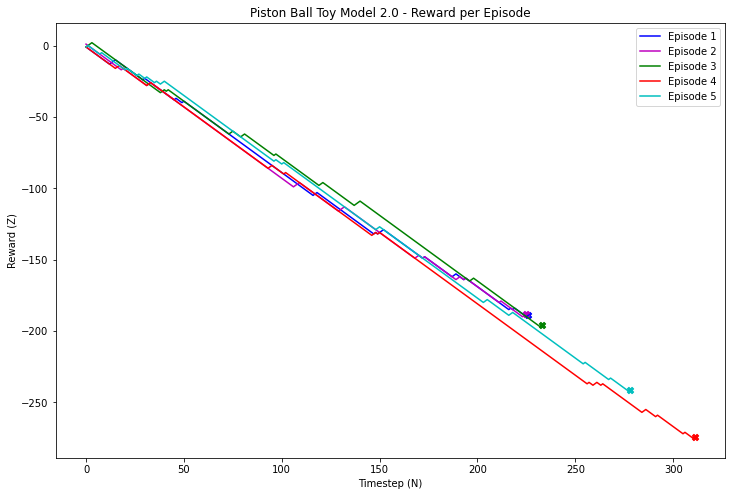

In [28]:
fig, ax = plt.subplots(1, figsize=(12, 8))
colours = ["b", "m", "g", "r", "c"]

for i in range(reward_lst.shape[0]):
  test = np.trim_zeros(reward_lst[i, :])
  ax.plot(test,color=colours[i])
  ax.scatter(len(test)-1, test[-1], marker='X',color=colours[i],s=40)
  ax.legend([f"Episode {i+1}" for i in range(reward_lst.shape[0])])
  plt.title("Piston Ball Toy Model 2.0 - Reward per Episode")
  print(f"Last Reward: {test[-1]} for Episode {i + 1}")
  ax.set_xlabel("Timestep (N)")
  ax.set_ylabel("Reward (Z)")